In [ ]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip /content/drive/MyDrive/facialData/UTKFace.zip -d /content/drive/MyDrive/facialData/
!unzip /content/drive/MyDrive/facialData/UTKFace.zip 

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: UTKFace/53_0_1_20170116191725055.jpg.chip.jpg  
  inflating: UTKFace/53_0_1_20170116192938845.jpg.chip.jpg  
  inflating: UTKFace/53_0_1_20170117181950281.jpg.chip.jpg  
  inflating: UTKFace/53_0_1_20170120222553113.jpg.chip.jpg  
  inflating: UTKFace/53_0_1_20170120222956787.jpg.chip.jpg  
  inflating: UTKFace/53_0_1_20170120223004304.jpg.chip.jpg  
  inflating: UTKFace/53_0_2_20170104210010763.jpg.chip.jpg  
  inflating: UTKFace/53_0_2_20170112215433623.jpg.chip.jpg  
  inflating: UTKFace/53_0_2_20170112221930338.jpg.chip.jpg  
  inflating: UTKFace/53_0_2_20170116192925824.jpg.chip.jpg  
  inflating: UTKFace/53_0_2_20170116192934154.jpg.chip.jpg  
  inflating: UTKFace/53_0_2_20170119205816456.jpg.chip.jpg  
  inflating: UTKFace/53_0_3_20170104220848558.jpg.chip.jpg  
  inflating: UTKFace/53_0_3_20170109132854337.jpg.chip.jpg  
  inflating: UTKFace/53_0_3_20170109142546975.jpg.chip.jpg  
  inflating: UTKFace/53_0_3_

In [ ]:
!unzip /content/drive/MyDrive/facialData/test_data.zip 

Archive:  /content/drive/MyDrive/facialData/test_data.zip
   creating: test_data/
  inflating: test_data/01_0_appareala3554916862eacad9a7ce8f92351024ceabboxa235a90a384a261.jpg  
  inflating: test_data/01_0_appareala732a467a9df4b8b7622d8c632bfe652babboxa249a55a346a162.jpg  
  inflating: test_data/01_0_appareala80ef7c0e7a68deb692c8d03c5fa654b4abboxa52a45a157a161.jpg  
  inflating: test_data/01_0_apparealaadb01f976cb5f699a43e02db61115ed6abboxa289a86a438a263.jpg  
  inflating: test_data/01_0_apparealab38eb55a30f81214c1001bfcedeff070abboxa147a16a228a111.jpg  
  inflating: test_data/01_0_apparealab625e022b7301343a5772d5125600ab4abboxa200a136a263a215.jpg  
  inflating: test_data/01_0_apparealae0739cdb532ced90d7f87d38de866f87abboxa325a87a540a326.jpg  
  inflating: test_data/01_1_appareala2507ff44441fe9899694be608a93059babboxa53a47a102a105.jpg  
  inflating: test_data/01_1_appareala4d925458800aff0de4c8234442afef3fabboxa93a132a274a370.jpg  
  inflating: test_data/02_0_appareala0f5cf40553de178366

In [ ]:
!unzip /content/drive/MyDrive/facialData/validation.zip 

Archive:  /content/drive/MyDrive/facialData/validation.zip
   creating: validation/
  inflating: validation/01_0_appareala3df37e21ab724c4efe966d70f8dbb504abboxa67a44a180a177.jpg  
  inflating: validation/01_0_appareala949e64e4d17fecfaaa5a3391a5b0c76eabboxa49a40a120a122.jpg  
  inflating: validation/01_0_apparealade6bacfec66f487fd5e7dda31c116488abboxa195a44a292a156.jpg  
  inflating: validation/01_0_apparealaf88d087c98b609a3f2951b0013abf8a1abboxa51a47a118a120.jpg  
  inflating: validation/01_1_appareala0f4199fda93f49538d319d00b8e5d7c2abboxa237a43a397a231.jpg  
  inflating: validation/01_1_appareala3970ef19365018679d2a7fe51b7cb916abboxa179a69a311a223.jpg  
  inflating: validation/01_1_appareala47574d9262bb0c8eab7343c1f3af3de7abboxa60a31a171a172.jpg  
  inflating: validation/01_1_apparealaac7c88f628b65e56ec5c3c6acfc418c2abboxa57a40a131a125.jpg  
  inflating: validation/02_0_appareala374f710c857dc65ae274b48ead4cb01cabboxa90a133a298a401.jpg  
  inflating: validation/02_0_appareala51b881a389

In [ ]:
!ls /content/test_data/| wc -l

4342


In [ ]:

!ls /content/UTKFace/ | wc -l

23708


In [ ]:
!ls /content/validation/| wc -l

2235


START

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import PIL
import PIL.Image
%matplotlib inline 
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml

--2022-12-14 11:39:29--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.04s   

2022-12-14 11:39:29 (24.5 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In this project I will use the pre-trained model haarcascade_frontalface_default.xml of opencv to detect faces in the photo.

PREPARE DATASET

In [ ]:

# #load file data
filelist_ds = tf.data.Dataset.list_files('/content/UTKFace/*')
# #load file test
testlist_ds = tf.data.Dataset.list_files('/content/test_data/*')
# # validation data
val_ds = tf.data.Dataset.list_files('/content/validation/*')



In [ ]:
name_of_class = [0,5,18,24,26,29,34,39,50,60,120]
def get_label (label_age):
    for i,age in enumerate(name_of_class):
        if label_age<=age:
            label = i-1
            break

    return label

In [ ]:
import os
#change the couple of direct and direct0 respectly to rename all filename to "classAge_classGender_orignalName"
# direct0 = '/content/validation/'
direct0 = '/content/test_data/'
# direct0 = '/content/UTKFace/'
# direct = '/content/validation1/'
direct = '/content/test_data1/'
# direct = '/content/UTKFace1/'
os.makedirs(direct)
for filename in os.listdir(direct0)[:]:
  part = filename.split('/')
  part = part[-1].split('_')
  label_age = int(part[0])
  label_gender = part[1]
  label_age = str(get_label( label_age))
  # part[0]=label_age
  newfile = direct+ label_age+'_'+label_gender+'_'+'_'.join(part)
  os.rename(direct0+filename,newfile)
  # print(newfile)
  # label_age = tf.strings.to_number(label_age,tf.float32)



In [76]:
#load new file train
filelist_ds = tf.data.Dataset.list_files('/content/UTKFace1/*')
#load file test
testlist_ds = tf.data.Dataset.list_files('/content/test_data1/*')
# validation data
val_ds = tf.data.Dataset.list_files('/content/validation1/*')

FUNCTION FOR LABELLING DATA

In [ ]:
classification = {'0':"age:0-5",      '1':"age:6-18",     '2':"age:19-24",
                  '3':"age:25-26",    '4':"age:27-29",   '5':"age:30-34",
                  '6': "age:35-39",   '7':"age:40-50",   '8':"age:50-60",
                  '9':"age:60+"   }


In [ ]:

name_of_class = [0,5,18,24,26,29,34,39,50,60,120]

def get_label (file_path, get_age=True,Num_to_Vec = True):
    part = tf.strings.split(file_path,'/')
    #label the age
    if get_age:
        label_age = tf.strings.split(part[-1],'_')[0]
        label = [0,0,0,0,0,0,0,0,0,0]
        if label_age=='0':
          label[0] = 1
        elif label_age=='1':
          label[1] = 1
        elif label_age=='2':
          label[2] = 1
        elif label_age=='3':
          label[3] = 1
        elif label_age=='4':
          label[4] = 1
        elif label_age=='5':
          label[5] = 1
        elif label_age=='6':
          label[6] = 1
        elif label_age=='7':
          label[7] = 1
        elif label_age=='8':
          label[8] = 1
        else :
          label[9] = 1
        print(label)
        if Num_to_Vec == False:
            label = float(tf.strings.split(part[-1],'_')[2])

    else:
        label = [0,0]
        label_gender = tf.strings.split(part[-1],'_')[1]
        if label_gender == '0':
            label[0] = 1
            if Num_to_Vec == False:
                    label = 0
        if label_gender == '1':
            label[1] = 1
            if Num_to_Vec == False:
                    label = 1
        
    return tf.convert_to_tensor(label,dtype = tf.float32)

# TEST    

for file in filelist_ds.take(9):
    print('file name', file.numpy().decode('utf-8'))
  
    age = get_label(file)
    gender = get_label(file,0)
    print('age:', age, ', gender:',gender)
    print('')

# for file in filelist_ds:
#     label.append((get_label(file).numpy()))
# print(len(label))

file name /content/UTKFace1/5_0_30_0_1_20170117142125041.jpg.chip.jpg
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
age: tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32) , gender: tf.Tensor([1. 0.], shape=(2,), dtype=float32)

file name /content/UTKFace1/5_0_32_0_1_20170113173419142.jpg.chip.jpg
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
age: tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32) , gender: tf.Tensor([1. 0.], shape=(2,), dtype=float32)

file name /content/UTKFace1/2_0_21_0_0_20170104020830476.jpg.chip.jpg
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
age: tf.Tensor([0. 0. 1. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32) , gender: tf.Tensor([1. 0.], shape=(2,), dtype=float32)

file name /content/UTKFace1/9_1_80_1_0_20170120222314991.jpg.chip.jpg
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
age: tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float32) , gender: tf.Tensor([0. 1.], shape=(2,), dtype=float32)

file name /content/UTKFace1/2_1_24_1_0_20170117194800876.jpg.chi

ANALYSIS DATA SPLITED

<BarContainer object of 2 artists>

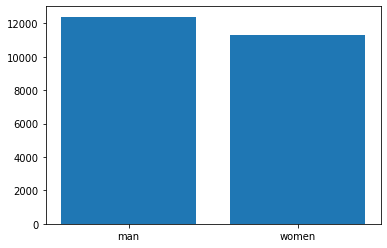

In [78]:
m=23708
label=[]

for file in filelist_ds:
    # print()
    label.append(get_label(file,get_age=False,Num_to_Vec = False))
label = np.array(label).reshape(m)
total_women = np.sum(label)
num_of_gender = [m-total_women,total_women]
plt.bar(['man','women'],num_of_gender)

In [ ]:
m=23708
label=[]

for file in filelist_ds:
    label.append((get_label(file,get_age=True,Num_to_Vec = False).numpy()))
label = np.array(label).reshape(m)

[0, 5, 18, 24, 26, 29, 34, 39, 50, 60, 120]
11 ,  10


Text(0, 0.5, 'samples')

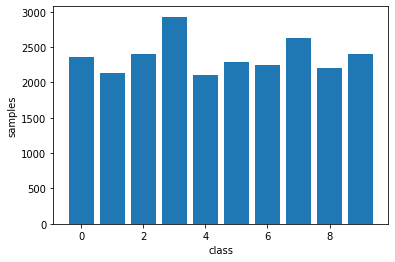

In [83]:
name_of_class = [0,5,18,24,26,29,34,39,50,60,120]
# print(label)
num_of_sample = []
a = list(label)
# print(a)
print(name_of_class)

label = np.array(label).reshape(m,1)
for i in range(len(name_of_class)-1):
    sample1 = label >name_of_class[i]
    sample2 = label <=name_of_class[i+1]
    samples= sample1*sample2
    
    num_of_sample.append(np.sum(samples))
print(len(name_of_class),', ',len(num_of_sample))

plt.bar(range(len(num_of_sample)),num_of_sample)
plt.xlabel('class')
plt.ylabel('samples')

FUNCTION FOR FACE DETECTION

In [ ]:

def face_detector_and_reszie(img_tensor,width,height):
    img_numpy = img_tensor.numpy()
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(img_numpy,1.1,3)
    
    if len(faces)!=0: # in case there is 
        faces = sorted(faces, key=lambda x:x[-1])
        # print(faces)
        x,y,w,h = 0,0,0,0
        if len(faces)!=1:
            if faces[-1][-1]/faces[-2][-1]>1.7:
                x,y,w,h = faces[0]
        else: x,y,w,h = faces[0]
        try:
            if w>=0.08*width: 
                x,y,w,h = faces[-1]
                # cv2.rectangle(img_numpy,(x,y),(x+w,y+h),(255,0,0),2)
                img_numpy = img_numpy[y:y+h,x:x+w,:]
                
        except: pass
    img_numpy = cv2.resize(img_numpy, [int(width),int(height)],interpolation = cv2.INTER_AREA)
    return img_numpy
    

    

In [ ]:
#TEST FACE DETECTION

for file in filelist_ds.take(1):
    img = tf.io.read_file(file)
    img = tf.image.decode_jpeg(img, channels =3)
    # print(img.shape)
    plt.imshow(img.numpy())
    plt.show()
    img = tf.py_function(func= face_detector_and_reszie,inp= [img,300,300], Tout= tf.uint8)
    img.set_shape((300,300,3))
    img = tf.image.rgb_to_grayscale(img)
    img = tf.image.convert_image_dtype(img,tf.float32)
    print(img.shape)


In [ ]:

# preprocessing
img_height = 64
img_width = 64
number_of_classes = 10


# parse function
def parse_func(img,label,face_detector= False):
    if face_detector:
      img = tf.py_function(func=face_detector_and_reszie,inp= [img,img_width,img_height], Tout= tf.uint8)
      img.set_shape((img_width,img_height,3))
      img = tf.image.rgb_to_grayscale(img)
      img = tf.image.convert_image_dtype(img,tf.float32)
      img = tf.image.resize(img,[img_width,img_height])
    else:
      img = tf.image.rgb_to_grayscale(img)
      img = tf.image.convert_image_dtype(img,tf.float32)
      img = tf.image.resize(img,[img_width,img_height])
    return img, label

# preprocess
@tf.function
def gender_preprocessing (file_path):
    #read file
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels =3)
    img = tf.image.rgb_to_grayscale(img)
    img = tf.image.convert_image_dtype(img,tf.float32)
    img = tf.image.resize(img,[img_width,img_height])
    label =  get_label(file_path,get_age=False)
    # return
    return img, label
@tf.function
def age_preprocessing (file_path,normalize = True):
    #read file
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels =3)
    
    if normalize:
      img = tf.image.rgb_to_grayscale(img)
      img = tf.image.convert_image_dtype(img,tf.float32)
      img = tf.image.resize(img,[img_width,img_height])
    else: img=img
    label = get_label(file_path)
    return img, label

DATASET

Create train dataset

In [ ]:
batch_size = 32
ds_size = 23708
# age dataset
filelist_ds = filelist_ds.shuffle(ds_size)
train_age_ds = filelist_ds
train_age_ds = train_age_ds.map(age_preprocessing, num_parallel_calls=tf.data.AUTOTUNE)
train_age_ds = train_age_ds.batch(batch_size)
train_age_ds = train_age_ds.prefetch(tf.data.AUTOTUNE)

val_size = 2235
val_age_ds =  val_ds.shuffle(val_size)
val_age_ds = val_age_ds.map((lambda x: age_preprocessing(x,True)), num_parallel_calls=tf.data.AUTOTUNE)
# val_age_ds = val_age_ds.map( lambda x, y:(parse_func(x,y,face_detector=True)), num_parallel_calls=tf.data.AUTOTUNE)
val_age_ds = val_age_ds.batch(batch_size)
val_age_ds = val_age_ds.prefetch(tf.data.AUTOTUNE)

test_size= 4342
test_age_ds = testlist_ds.shuffle(test_size)
test_age_ds = test_age_ds.map((lambda x:age_preprocessing(x,True)), num_parallel_calls=tf.data.AUTOTUNE)
# test_age_ds = test_age_ds.map( lambda x, y:(parse_func(x,y,face_detector=True)), num_parallel_calls=tf.data.AUTOTUNE)
test_age_ds = test_age_ds.batch(batch_size)
test_age_ds = test_age_ds.prefetch(tf.data.AUTOTUNE)

In [ ]:
# filelist_ds = filelist_ds.shuffle(ds_size)
train_gender_ds = filelist_ds.shuffle(ds_size)


train_gender_ds = train_gender_ds.map(gender_preprocessing, num_parallel_calls=tf.data.AUTOTUNE)
# train_gender_ds = train_gender_ds.map( lambda x, y:(parse_func(x,y,face_detector=True)), num_parallel_calls=tf.data.AUTOTUNE)
train_gender_ds = train_gender_ds.batch(batch_size)
train_gender_ds = train_gender_ds.prefetch(tf.data.AUTOTUNE)

val_gender_ds =  val_ds.shuffle(val_size)
val_gender_ds = val_gender_ds.map(gender_preprocessing, num_parallel_calls=tf.data.AUTOTUNE)
# val_gender_ds = val_gender_ds.map( lambda x, y:(parse_func(x,y,face_detector=True)), num_parallel_calls=tf.data.AUTOTUNE)
val_gender_ds = val_gender_ds.batch(batch_size)
val_gender_ds = val_gender_ds.prefetch(tf.data.AUTOTUNE)


test_gender_ds = testlist_ds.shuffle(test_size)
test_gender_ds = test_gender_ds.map(gender_preprocessing, num_parallel_calls=tf.data.AUTOTUNE)
# test_gender_ds = test_gender_ds.map( lambda x, y:(parse_func(x,y,face_detector=True)), num_parallel_calls=tf.data.AUTOTUNE)
test_gender_ds = test_gender_ds.batch(batch_size)
test_gender_ds = test_gender_ds.prefetch(tf.data.AUTOTUNE)

In [ ]:
print(len(train_age_ds)*batch_size)
print(len(val_age_ds)*batch_size)
print(len(test_age_ds)*batch_size)
print()
print(len(train_gender_ds)*batch_size)
print(len(val_gender_ds)*batch_size)
print(len(test_gender_ds)*batch_size)


23712
2240
4352

23712
2240
4352


In [ ]:
it = iter(val_gender_ds)
print(next(it)[1])

tf.Tensor(
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]], shape=(32, 2), dtype=float32)


In [ ]:
it = iter(test_age_ds)
print(next(it)[0])


MODEL JUST FOR AGE CLASSIFICATION ( THE WEIGHTS AFTER TRAINED WILL BE USED LATER)

In [ ]:
# modeling


# Create model with functional API

inputs = tf.keras.Input(shape=(img_height,img_width,1))

# first convolution 
conv1 = layers.Conv2D(96,(5,5),strides = (1,1),padding = 'valid',activation='relu')(inputs)
norm1 = tf.keras.layers.BatchNormalization()(conv1)
pool1 = layers.MaxPool2D(pool_size = (3,3),strides =2)(norm1)
# norm1 = layers.Lambda(tf.nn.local_response_normalization, name='local_response_norm1')(pool1)


# second convolution
conv2 = layers.Conv2D(256,(5,5),strides = (2,2),padding = 'valid',activation='relu')(norm1)
pool2 = layers.MaxPool2D(pool_size = (3,3),strides =2)(conv2)
norm2 = layers.Lambda(tf.nn.local_response_normalization, name='local_response_norm2')(pool2)
# third convolution
conv3 = layers.Conv2D(384,(3,3),strides = (1,1),padding = 'valid',activation='relu')(norm2)
pool3 = layers.MaxPool2D(pool_size = (3,3),strides =2)(conv3)

Flat = layers.Flatten()(pool3)


# fully connected 
# for age
age = layers.Dropout(0.2)(Flat)
age = layers.Dense(256,activation = 'relu')(age)
age = layers.Dropout(0.2)(Flat)
age = layers.Dense(256,activation = 'relu')(age)
age = layers.Dropout(0.3)(Flat)
age = layers.Dense(64,activation = 'relu')(age)
age_out = layers.Dense(number_of_classes,activation = 'Softmax',name ='solfmaxDese')(age)


model = tf.keras.Model(inputs, age_out)
base_model = tf.keras.Model(inputs,norm2)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 60, 60, 96)        2496      
                                                                 
 batch_normalization (BatchN  (None, 60, 60, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 local_response_norm2 (Lambd  (None, 13, 13, 256)      0     

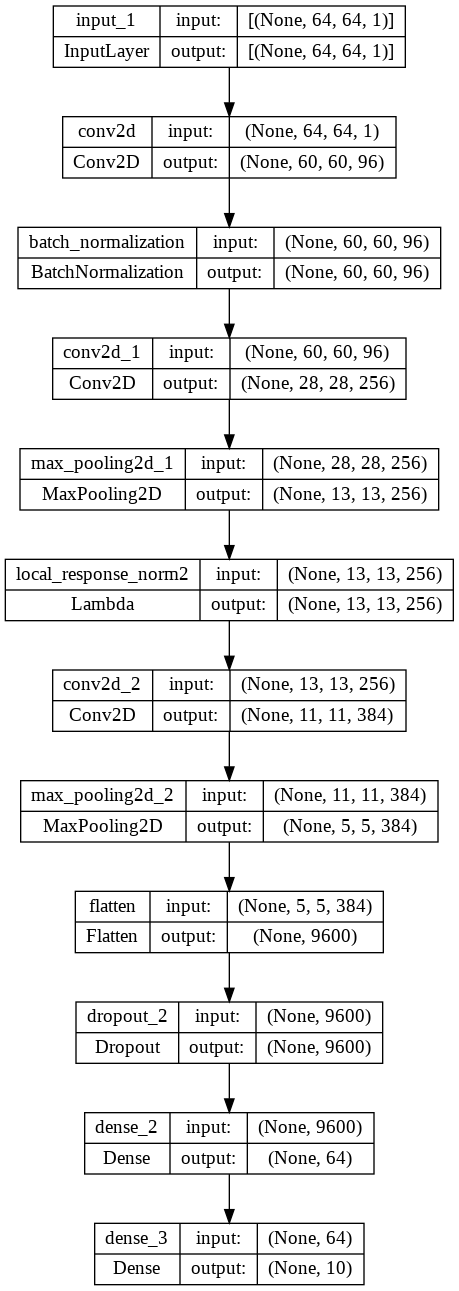

In [ ]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [ ]:
model_trained = tf.keras.models.load_model('/content/drive/MyDrive/facialData/dataAge.h5')
model_trained.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)

In [ ]:
model_trained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 60, 60, 96)        2496      
                                                                 
 batch_normalization (BatchN  (None, 60, 60, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 local_response_norm2 (Lambd  (None, 13, 13, 256)      0     

In [ ]:

# compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)

TRAINING AND SAVING

In [ ]:
import os
checkpoint_path="/content/drive/MyDrive/facialData/training_2/cp-{epoch:04d}.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=200*batch_size)

model_trained.save_weights(checkpoint_path.format(epoch=0))
latest = tf.train.latest_checkpoint('/content/drive/MyDrive/facialData/training_2/')
print(latest)
# model.save_weights(checkpoint_path.format(epoch=0))

In [ ]:
model.load_weights(latest)

In [ ]:
# train model
# can see that the loss of test is very large => the test is very bad result (high bias, high variance),but I don't know how to fix
for i in range(1):
  model_history = model.fit(train_age_ds, epochs=5,verbose=1, workers =2,callbacks = [cp_callback],validation_data = val_age_ds)
  model.save('/content/drive/MyDrive/facialData/dataAge.h5')

Epoch 1/5
741/741 [==============================] - 39s 52ms/step - loss: 0.1656 - accuracy: 0.9409 - val_loss: 6.6750 - val_accuracy: 0.1946
Epoch 2/5
741/741 [==============================] - 38s 51ms/step - loss: 0.1752 - accuracy: 0.9404 - val_loss: 6.7784 - val_accuracy: 0.1812
Epoch 3/5
741/741 [==============================] - 38s 51ms/step - loss: 0.1624 - accuracy: 0.9443 - val_loss: 7.9655 - val_accuracy: 0.2009
Epoch 4/5
741/741 [==============================] - 35s 48ms/step - loss: 0.1631 - accuracy: 0.9427 - val_loss: 7.0804 - val_accuracy: 0.1839
Epoch 5/5
741/741 [==============================] - 39s 52ms/step - loss: 0.1550 - accuracy: 0.9463 - val_loss: 6.4657 - val_accuracy: 0.1633


MODEL FOR GENDER INHERITED WEIGHTS FROM AGE

In [80]:
#for gender
#take the trained weight of age cnn

base_model.trainable=False # Freeze the trained model

#modeling
#Read
gen_inputs = tf.keras.Input(shape=(img_height,img_width,1))
#put into trained model:
gender_base = base_model(gen_inputs)
conv3 = layers.Conv2D(384,(3,3),strides = (1,1),padding = 'valid',activation='relu')(gender_base)
pool3 = layers.MaxPool2D(pool_size = (3,3),strides =2)(conv3)
Flat = layers.Flatten()(pool3)
#fully connected
gender = layers.Dropout(0.5)(Flat)
gender = layers.Dense(64,activation = 'relu')(gender)
gender = layers.Dense(64,activation = 'relu')(gender)
gender_out = layers.Dense(2,activation = 'Softmax')(gender)

gender_model=tf.keras.Model(gen_inputs,gender_out)

In [ ]:
gender_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 model_1 (Functional)        (None, 13, 13, 256)       617536    
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 384)       885120    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 384)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 9600)              0         
                                                                 
 dropout_3 (Dropout)         (None, 9600)              0         
                                                           

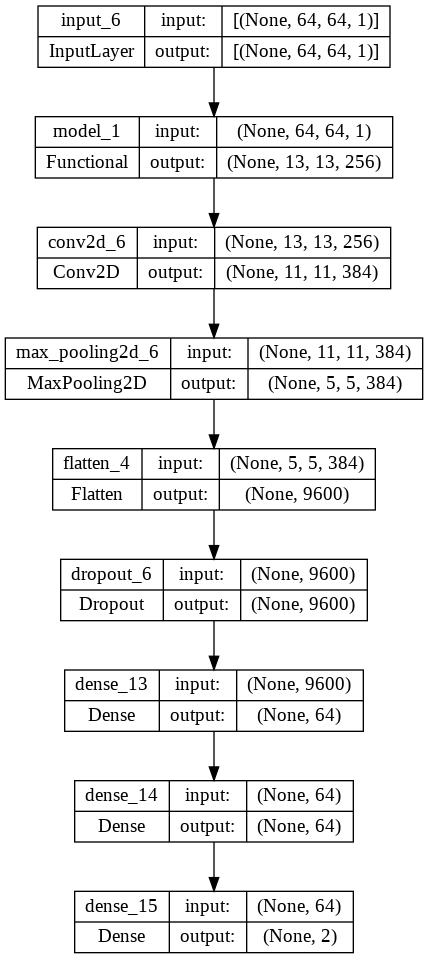

In [81]:
tf.keras.utils.plot_model(gender_model, 'model1.png', show_shapes=True)

In [ ]:
gender_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)

In [ ]:
gender_trained = tf.keras.models.load_model('/content/drive/MyDrive/facialData/dataGender.h5')
gender_trained.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)
import os
checkpoint_path="/content/drive/MyDrive/facialData/training2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=200*batch_size)

gender_trained.save_weights(checkpoint_path.format(epoch=0))
latest1 = tf.train.latest_checkpoint('/content/drive/MyDrive/facialData/training2/')
print(latest1)

In [ ]:
gender_trained.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 model_1 (Functional)        (None, 13, 13, 256)       617536    
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 384)       885120    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 384)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 9600)              0         
                                                                 
 dropout_3 (Dropout)         (None, 9600)              0         
                                                           

In [ ]:
gender_model.load_weights(latest1)

In [ ]:

for i in range(2):
  gender_model_history = gender_model.fit(train_gender_ds, epochs=10,verbose=1)
  gender_model.save('/content/drive/MyDrive/facialData/dataGender.h5')

Epoch 1/10
741/741 [==============================] - 25s 33ms/step - loss: 0.0106 - accuracy: 0.9958
Epoch 2/10
741/741 [==============================] - 43s 58ms/step - loss: 0.0096 - accuracy: 0.9956
Epoch 3/10
741/741 [==============================] - 70s 95ms/step - loss: 0.0106 - accuracy: 0.9960
Epoch 4/10
741/741 [==============================] - 68s 92ms/step - loss: 0.0101 - accuracy: 0.9965
Epoch 5/10
741/741 [==============================] - 68s 91ms/step - loss: 0.0117 - accuracy: 0.9954
Epoch 6/10
741/741 [==============================] - 69s 93ms/step - loss: 0.0091 - accuracy: 0.9963
Epoch 7/10
741/741 [==============================] - 68s 91ms/step - loss: 0.0104 - accuracy: 0.9958
Epoch 8/10
741/741 [==============================] - 68s 92ms/step - loss: 0.0116 - accuracy: 0.9953
Epoch 9/10
741/741 [==============================] - 63s 85ms/step - loss: 0.0117 - accuracy: 0.9957
Epoch 10/10
741/741 [==============================] - 67s 90ms/step - loss: 0.011

In [68]:
# test dataset
score_age = model.evaluate(test_age_ds, verbose =1)
print("loss age=", score_age[0])
print("accuracy age= ", score_age[1])

136/136 [==============================] - 25s 181ms/step - loss: 7.4374 - accuracy: 0.1974
loss age= 7.4374189376831055
accuracy age=  0.19737447798252106


In [69]:
score_gen = gender_model.evaluate(test_gender_ds, verbose =1)
print("loss gen=", score_gen[0])
print("accuracy gen= ", score_gen[1])

136/136 [==============================] - 17s 127ms/step - loss: 1.9752 - accuracy: 0.6614
loss gen= 1.9751522541046143
accuracy gen=  0.6614463329315186


In [ ]:
#save model
model.save('/content/drive/MyDrive/facialData/dataAge.h5')
gender_model.save('/content/drive/MyDrive/facialData/dataGender.h5')

In [74]:

def Face_Dectect_Resize_TestPredict(img_numpy,width,height):
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    m,n = img_numpy.shape
    faces = face_cascade.detectMultiScale(img_numpy,1.1,3)
    if len(faces)!=0: # in case there is 
        faces = sorted(faces, key=lambda x:x[-1])
        # print(faces)
        x,y,w,h = 0,0,0,0
        if len(faces)!=1:
            if faces[-1][-1]/faces[-2][-1]>1.7:
                x,y,w,h = faces[0]
        else:
          x,y,w,h = faces[0]
          # print(w)
        try:
            if w>=m*0.5: 
                x,y,w,h = faces[-1]
                img_numpy = img_numpy[y:y+h,x:x+w]

                
                
        except: pass
    img_numpy = cv2.resize(img_numpy, [int(width),int(height)],interpolation = cv2.INTER_AREA)
    return img_numpy
def UnNumtoVec(vec,maxlength):# change a vector of 0 and 1 in to a number
    ind = np.argmax(vec)
    prob = vec[0][ind]
    return ind,prob
def get_age(input):
    class_age, prob = UnNumtoVec(input,10)
    class_age = classification[str(class_age)]
    if prob<=0.7:
      class_age = 'not sure, maybe in '+class_age
    return class_age
def get_gender(input):
    class_gender,proxy_bypass = UnNumtoVec(input,2)
    # print(class_gender)
    if class_gender ==1:
      class_gender= 'female'
    else: class_gender ='male'
    return class_gender
def get_result(img):
    # img =  Face_Dectect_Resize_TestPredict(img,64,64)
    img = cv2.resize(img, [64,64],interpolation = cv2.INTER_AREA)
    plt.imshow(img,cmap='gray')
    plt.show()
    age_val = model.predict( np.array([ img ]) )   
    gender_val =gender_model.predict( np.array([ img ]) ) 
    age = get_age(age_val)
    gender= get_gender(gender_val)
    # print("Predicted Gender:",gender,"Predicted Age:",age)
    print("age Values:",age_val," gender values:",gender_val,"\nPredicted Gender:",gender,"Predicted Age:",age)

In [70]:
for filename in filelist_ds.take(9):
  print(filename)

tf.Tensor(b'/content/UTKFace1/0_0_1_0_0_20161219192524675.jpg.chip.jpg', shape=(), dtype=string)
tf.Tensor(b'/content/UTKFace1/3_0_25_0_0_20170117134757190.jpg.chip.jpg', shape=(), dtype=string)
tf.Tensor(b'/content/UTKFace1/6_0_35_0_1_20170114034617407.jpg.chip.jpg', shape=(), dtype=string)
tf.Tensor(b'/content/UTKFace1/2_0_24_0_0_20170117003314278.jpg.chip.jpg', shape=(), dtype=string)
tf.Tensor(b'/content/UTKFace1/5_0_32_0_1_20170113135328377.jpg.chip.jpg', shape=(), dtype=string)
tf.Tensor(b'/content/UTKFace1/6_0_37_0_4_20170117140108503.jpg.chip.jpg', shape=(), dtype=string)
tf.Tensor(b'/content/UTKFace1/3_0_26_0_0_20170117171613595.jpg.chip.jpg', shape=(), dtype=string)
tf.Tensor(b'/content/UTKFace1/5_1_31_1_1_20170116002105934.jpg.chip.jpg', shape=(), dtype=string)
tf.Tensor(b'/content/UTKFace1/0_1_4_1_2_20161219160314709.jpg.chip.jpg', shape=(), dtype=string)


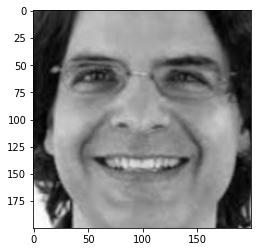

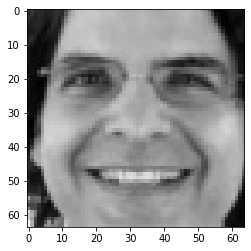

1/1 [==============================] - 0s 87ms/step
age Values: [[1.4412709e-07 3.2435059e-05 1.0847752e-04 9.8280668e-01 1.7812918e-03
  1.9247806e-05 1.5208723e-02 4.3001452e-05 1.7828603e-08 1.1845122e-08]]  gender values: [[9.999949e-01 5.076034e-06]] 
Predicted Gender: male Predicted Age: age:25-26


In [71]:
img = cv2.imread("/content/UTKFace1/6_0_37_0_4_20170117140108503.jpg.chip.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray')
plt.show()
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
get_result(img)

In [72]:
os.makedirs("anh")

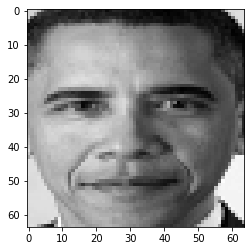

1/1 [==============================] - 0s 16ms/step
age Values: [[1.1886958e-03 2.5301909e-01 2.1663031e-03 7.6089315e-02 4.9927211e-03
  1.8905077e-04 6.5251702e-01 4.5319297e-03 5.2759065e-06 5.3005763e-03]]  gender values: [[1.000000e+00 3.041249e-19]] 
Predicted Gender: male Predicted Age: not sure, maybe in age:35-39



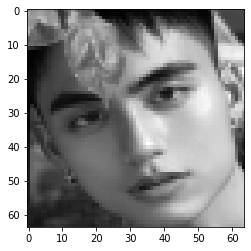

1/1 [==============================] - 0s 15ms/step
age Values: [[8.4585464e-03 2.8887617e-03 5.9543461e-01 1.6753638e-02 2.0786686e-01
  5.2834035e-05 1.6850537e-01 2.4585954e-05 1.2679418e-05 2.1909564e-06]]  gender values: [[0.8236751  0.17632492]] 
Predicted Gender: male Predicted Age: not sure, maybe in age:19-24



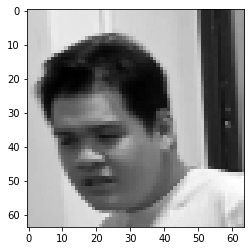

1/1 [==============================] - 0s 15ms/step
age Values: [[8.4133462e-05 6.1983679e-04 5.3866159e-02 4.8120937e-01 1.4432320e-01
  1.8200094e-03 3.1640080e-01 1.5091423e-03 5.9835857e-05 1.0758546e-04]]  gender values: [[0.80860543 0.19139457]] 
Predicted Gender: male Predicted Age: not sure, maybe in age:25-26



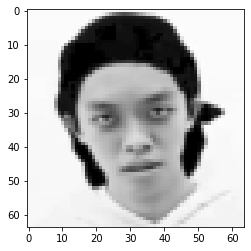

1/1 [==============================] - 0s 16ms/step
age Values: [[6.1567334e-05 1.5075831e-03 5.6761019e-05 7.2298071e-04 6.7527890e-02
  9.2915785e-01 2.3200353e-04 3.2621203e-05 3.0716689e-04 3.9359639e-04]]  gender values: [[0.01925496 0.98074496]] 
Predicted Gender: female Predicted Age: age:30-34



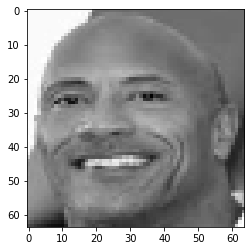

1/1 [==============================] - 0s 16ms/step
age Values: [[0.00869306 0.04768751 0.00080909 0.06418832 0.0108526  0.06130581
  0.24015588 0.14238124 0.02127822 0.40264833]]  gender values: [[1.0000000e+00 3.7691217e-10]] 
Predicted Gender: male Predicted Age: not sure, maybe in age:60+



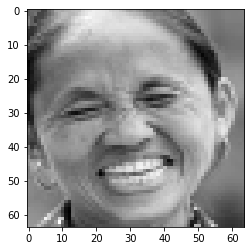

1/1 [==============================] - 0s 17ms/step
age Values: [[3.4257418e-03 1.9605050e-03 2.1807580e-06 5.8343273e-02 2.2274001e-02
  8.1386315e-03 1.7397715e-01 1.4981023e-03 9.2025055e-04 7.2946018e-01]]  gender values: [[1.000000e+00 7.399543e-09]] 
Predicted Gender: male Predicted Age: age:60+



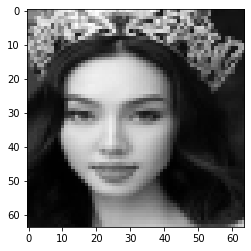

1/1 [==============================] - 0s 16ms/step
age Values: [[1.14319343e-02 2.35899270e-01 1.00072056e-01 1.17947772e-01
  4.46609765e-01 1.00780101e-02 7.76108056e-02 5.18208026e-06
  3.35156074e-04 1.00619573e-05]]  gender values: [[0.00420935 0.99579066]] 
Predicted Gender: female Predicted Age: not sure, maybe in age:27-29



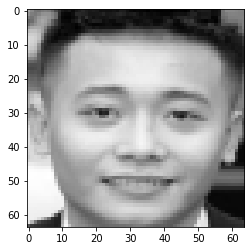

1/1 [==============================] - 0s 15ms/step
age Values: [[3.3873115e-05 3.7881911e-02 7.6482996e-02 1.6493093e-02 2.2183725e-01
  4.6690449e-02 5.8506632e-01 1.5591779e-03 9.0147331e-03 4.9401801e-03]]  gender values: [[9.9993181e-01 6.8188245e-05]] 
Predicted Gender: male Predicted Age: not sure, maybe in age:35-39



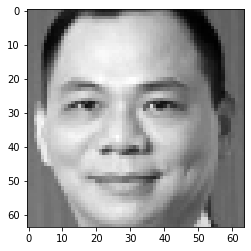

1/1 [==============================] - 0s 16ms/step
age Values: [[1.01247388e-05 3.04776011e-04 5.37979104e-05 1.53894857e-01
  6.30994420e-03 1.05694657e-04 8.34933519e-01 1.98948383e-03
  1.22314505e-05 2.38559977e-03]]  gender values: [[0.99700207 0.00299797]] 
Predicted Gender: male Predicted Age: age:35-39



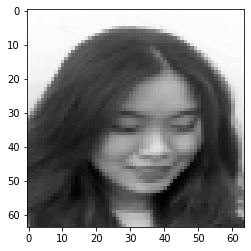

1/1 [==============================] - 0s 16ms/step
age Values: [[1.3781434e-04 1.4536895e-04 5.2402807e-08 2.2093491e-01 2.6949909e-01
  3.5623008e-01 9.0965452e-03 1.1179401e-01 6.4578639e-06 3.2155648e-02]]  gender values: [[0.1704328  0.82956713]] 
Predicted Gender: female Predicted Age: not sure, maybe in age:30-34



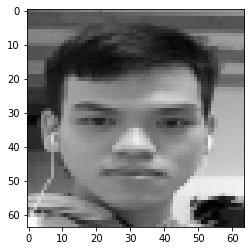

1/1 [==============================] - 0s 16ms/step
age Values: [[0.00568986 0.08962762 0.20622204 0.3632751  0.09694169 0.09556415
  0.04406716 0.07312036 0.01451399 0.01097805]]  gender values: [[0.9972499  0.00275009]] 
Predicted Gender: male Predicted Age: not sure, maybe in age:25-26



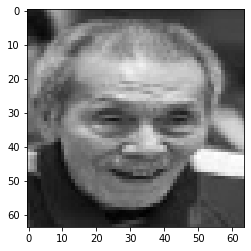

1/1 [==============================] - 0s 17ms/step
age Values: [[0.02287081 0.02309094 0.02423559 0.001229   0.03140242 0.00655478
  0.01836528 0.653275   0.11508924 0.10388692]]  gender values: [[0.99893576 0.00106425]] 
Predicted Gender: male Predicted Age: not sure, maybe in age:40-50



In [75]:
for filename in os.listdir('/content/anh'):
  img = cv2.imread('/content/anh/'+filename, cv2.IMREAD_GRAYSCALE)
  # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  get_result(img)
  print()
  